# 1. Apply Linear Regression to the provided dataset using underlying steps

In [1]:
import numpy as np # importing numpy as np
import matplotlib.pyplot as plt # importing matplotlib.pyplot as plt
import pandas as pd # importing pandas as pd
from sklearn.metrics import confusion_matrix # importing confusion_matrix from sklearn.metrics
from sklearn.metrics import classification_report # importing classification_report from sklearn.metrics
from sklearn.model_selection import train_test_split # importing train_test_split from sklearn.model_selection
import warnings # importing warnings
warnings.filterwarnings("ignore") # to ignore all the warnings

### a. Import the given “Salary_Data.csv”

In [2]:
salary = pd.read_csv('Salary_Data.csv') # reading salary dataset and storing it as salary

In [3]:
X = salary.iloc[:, :-1].values # considering YearsExperience as X
Y = salary.iloc[:, 1].values # considering Salary as Y

### b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

In [4]:
# splitting the given datasets into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

### c. Train and predict the model.

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression # importing LinearRegression from sklearn.linear_model
regressor = LinearRegression() # creating the model
regressor.fit(X_train, Y_train) # feeding the model with train data
Y_pred = regressor.predict(X_test) # predicting the salary from test data

### d. Calculate the mean_squared error

In [6]:
from sklearn.metrics import mean_squared_error # importing mean_squared_error from sklearn.metrics
mean_squared_error(Y_test, Y_pred) # finding the mean_squared_error from predicted result and actual result

21026037.329511296

### e. Visualize both train and test data using scatter plot.

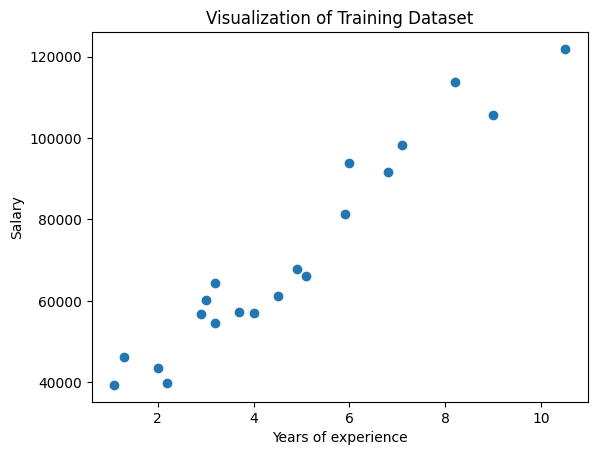

In [7]:
plt.scatter(X_train,Y_train) # plotting scatter plot for training data
plt.xlabel("Years of experience") # labelling x axis
plt.ylabel("Salary") # labelling y axis
plt.title('Visualization of Training Dataset') # title for the scatter plot
plt.show() # showing the plot

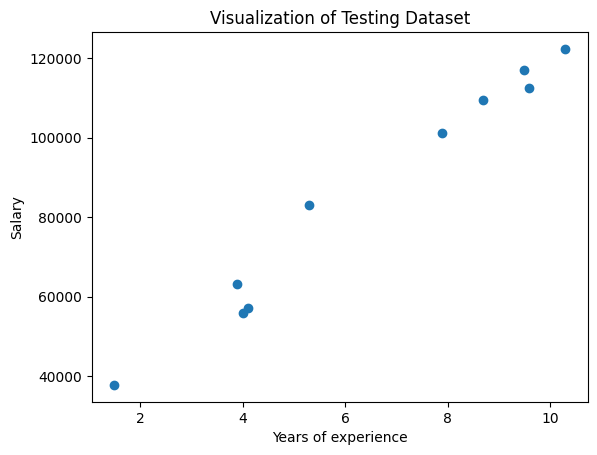

In [8]:
plt.scatter(X_test,Y_test) # plotting scatter plot for testing data
plt.xlabel("Years of experience") # labelling x axis
plt.ylabel("Salary") # labelling y axis
plt.title('Visualization of Testing Dataset') # title for the scatter plot
plt.show() # showing the plot

# 2. Apply K means clustering in the dataset provided

In [9]:
data = pd.read_csv('K-Mean_Dataset.csv') # reading K-mean_Dataset and storing it as data

### Remove any null values by the mean

In [10]:
data.fillna(data.mean(),axis=0,inplace=True) # Replacing all the NaN values with mean of the respective column

### Use the elbow method to find a good number of clusters with the K-Means algorithm

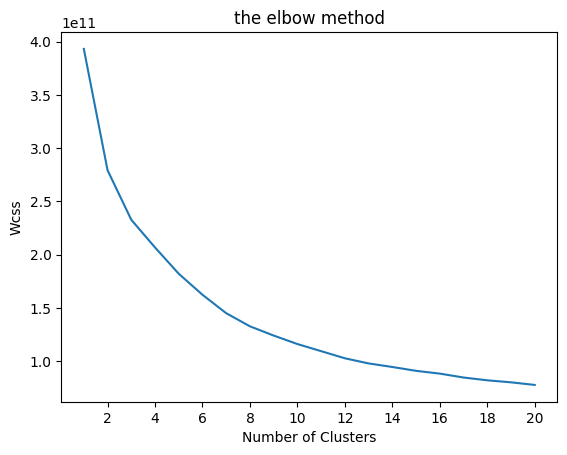

In [11]:
# KMeans Clustering
from sklearn.cluster import KMeans # importing KMeans from sklearn.cluster
x = data.drop(columns=['CUST_ID','TENURE']) # dropping 'CUST_ID','TENURE' and storing remaining columns as x
y = data['TENURE'] # considering 'TENURE' as y
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0) # creating the model
    kmeans.fit(x) # feeding training data to the model
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss) # plotting graph for range(1,21) and wcss
plt.title('the elbow method') # title for the plot
plt.xlabel('Number of Clusters') # labelling x axis
plt.ylabel('Wcss') # labelling y axis
x_ticks = range(2,21,2) # values of x_ticks
plt.xticks(x_ticks) # labelling the axis with the xtick values
plt.show() # showing the plot

### Calculate the silhouette score for the above clustering

In [14]:
nclusters = 8 # this is the k in kmeans
km = KMeans(n_clusters=nclusters) # creating the model
km.fit(x) # feeding the model with train data
y_cluster_kmeans = km.predict(x) # predicting y values from x values
from sklearn.metrics import silhouette_score # importing silhoutte_score from sklearn.metrics
score = silhouette_score(x, y_cluster_kmeans) # finding the silhouette_score
print(score) # printing silhouette_score

0.38110116036181874


# 3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why

### Scaling the data using StandardScaler with standard deviation as False

In [13]:
from sklearn import preprocessing # importing preprocessing from sklearn
scaler = preprocessing.StandardScaler(with_std=False) # creating a StandardScalar to scale the data
scaler.fit(x) # feeding the data to the scalar
X_scaled_array = scaler.transform(x) # scaling the data using Standard Scalar function
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns) # creating a new dataframe with scaled data
nclusters = 8 # this is the k in kmeans
km = KMeans(n_clusters=nclusters) # creating the model
km.fit(X_scaled) # feeding the model with scaled data
y_cluster_kmeans = km.predict(X_scaled) # predicting the y values with scaled values of x
from sklearn.metrics import silhouette_score # importing silhoutte_score from sklearn.metrics
score = silhouette_score(X_scaled, y_cluster_kmeans) # finding the silhoutte_score
print(score) # printing slihoutte_score

0.3817270574416485


### Scaling the data using MinMaxScaler

In [15]:
minmax_scaler = preprocessing.MinMaxScaler() # creating a MinMaxScalar to scale the data
minmax_scaler.fit(x) # feeding the data to the scaler
X_scaled_array = minmax_scaler.transform(x) # scaling the data using  MinMasxScalar function
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns) # creating a new dataframe with scaled data
nclusters = 8 # this is the k in kmeans
km = KMeans(n_clusters=nclusters) # creating the model
km.fit(X_scaled) # feeding the model with scaled data
y_cluster_kmeans = km.predict(X_scaled) # predicting the y values with scaled values of x
from sklearn.metrics import silhouette_score # importing silhoutte_score from sklearn.metrics
score = silhouette_score(X_scaled, y_cluster_kmeans) # finding the silhoutte_score
print(score) # printing slihoutte_score

0.3602583764150488


### Scaling the data using Normalizer with norm = 'max'

In [16]:
normalizer = preprocessing.Normalizer(norm='max') # creating a Normalizer to scale the data
normalizer.fit(x) # feeding the data to the scaler
X_scaled_array = normalizer.transform(x) # scaling the data using  Normalizer function
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns) # creating a new dataframe with scaled data
nclusters = 8 # this is the k in kmeans
km = KMeans(n_clusters=nclusters) # creating the model
km.fit(X_scaled) # feeding the model with scaled data
y_cluster_kmeans = km.predict(X_scaled) # predicting the y values with scaled values of x
from sklearn.metrics import silhouette_score # importing silhoutte_score from sklearn.metrics
score = silhouette_score(X_scaled, y_cluster_kmeans) # finding the silhoutte_score
print(score) # printing silhoutte_score

0.31518129338430095


### Justification
Yes, the Silhouette score is imporoved when we scale the data using the StandardScaler with standard deviation set to False. Upon checking the silhouette score when the data is scaled with different scaling techniques ( StandardScalar, MinMaxScalar and Normalizer), it is observed that the silhoutte score is improved only with StandardScaler technique and the silhouette score for the scaled data using other scaling techniques is less when compared to the silhouette score for the data without scaling